# Read some traces from Tek TDS5000
20200622 weg started<br>
Seems the CSV files might have a bunch of traces.<br>

In [1]:
%matplotlib notebook

import sys, os, glob, logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# manipulate the grid
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pandas as pd


In [2]:
fdir = './data/'
fname = '200620_185602.csv'  # -300mV trigger, S/N 6165 ch 4, big csv many traces
#fname = '200620_184104.csv'  # -100mV trigger, S/N 6165 ch 4, big csv many traces
tstamp = fname.split('.')[0]
datadir = f'/home/gabella/Documents/quarknet/quarknet2020/tek5000/data/savesets{tstamp}/'

print(f'Using file {fname}.\nOutputs in datadir\n{datadir}.')

Using file 200620_185602.csv.
Outputs in datadir
/home/gabella/Documents/quarknet/quarknet2020/tek5000/data/savesets200620_185602/.


In [3]:
!mkdir -p $datadir

In [4]:
#dir(pd)

In [5]:
adf = pd.read_csv(fdir+fname, header=None, names=['A', 'B', 'C', 'time', 'volt'] )

In [6]:
adf.head()

A             B        C          time          volt
0    Record Length  5.000000e+02   Points -3.000000e-08 -1.600001e-02
1  Sample Interval  2.000000e-10        s -2.980000e-08 -8.000013e-03
2    Trigger Point  1.500000e+02  Samples -2.960000e-08 -8.000013e-03
3     Trigger Time  2.383245e-11        s -2.940000e-08 -1.341105e-08
4              NaN           NaN      NaN -2.920000e-08 -1.341105e-08

In [7]:
len( adf['time'] )

38000

In [8]:
colors = list(mcolors.TABLEAU_COLORS)
ncolors = len(colors); ncolors

10

<IPython.core.display.Javascript object>


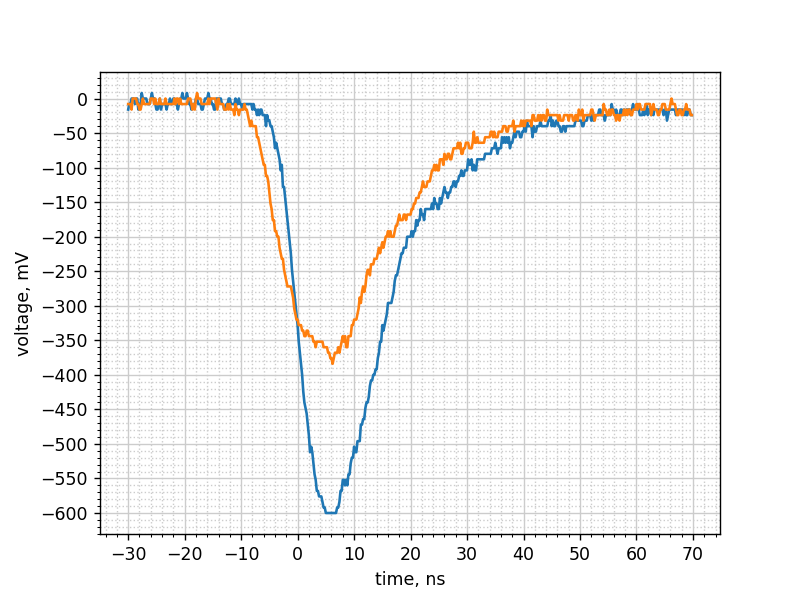

In [9]:
xx = adf['time'].values[0:500]*1e9 # in ns
yy = adf['volt'].values[0:500]*1000. # in mV
xx2 = adf['time'].values[500:1000]*1e9 # in ns
yy2 = adf['volt'].values[500:1000]*1000. # in mV


fig, ax = plt.subplots( )

ax.plot( xx, yy, '-', color=colors[0%10], label='first set' )
ax.plot( xx2, yy2, '-', color=colors[1%10], label='second set' )

if 1:
    # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(50))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

# if 0:
#     # Major ticks every 20, minor ticks every 5
#     major_ticks = np.arange(0, 101, 20)
#     minor_ticks = np.arange(0, 101, 5)

#     ax.set_xticks(major_ticks)
#     ax.set_xticks(minor_ticks, minor=True)
#     ax.set_yticks(major_ticks)
#     ax.set_yticks(minor_ticks, minor=True)

#     # And a corresponding grid
#     ax.grid(which='both')

#     # Or if you want different settings for the grids:
#     ax.grid(which='minor', alpha=0.2)
#     ax.grid(which='major', alpha=0.5)

ax.set_xlabel('time, ns')
ax.set_ylabel('voltage, mV')

plt.show()

In [10]:
#[ int( len(adf['time'])/numPoints +0.1 ), list( range(0,76,5) )  ]

<IPython.core.display.Javascript object>


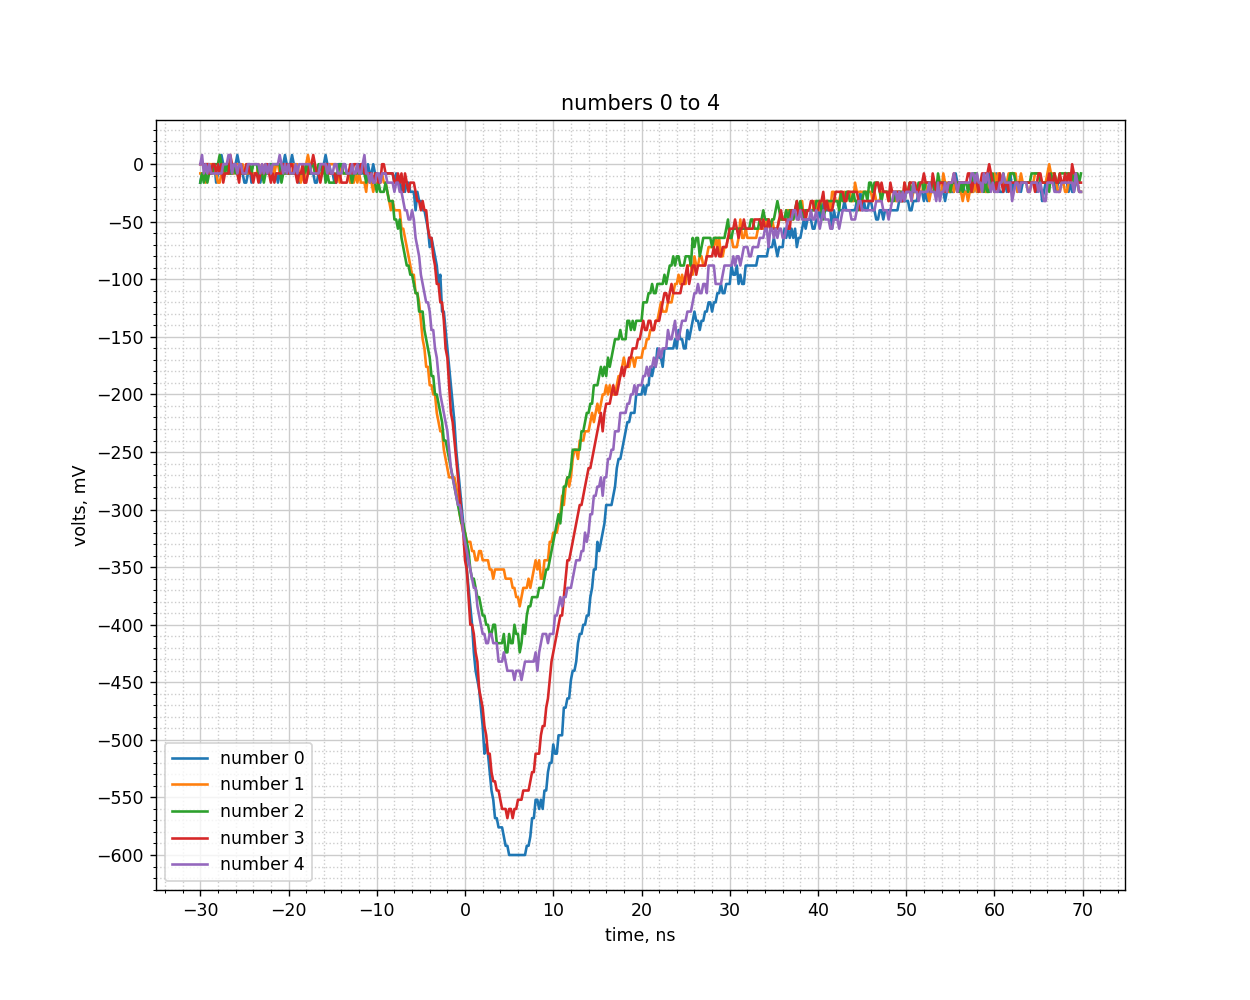

<IPython.core.display.Javascript object>


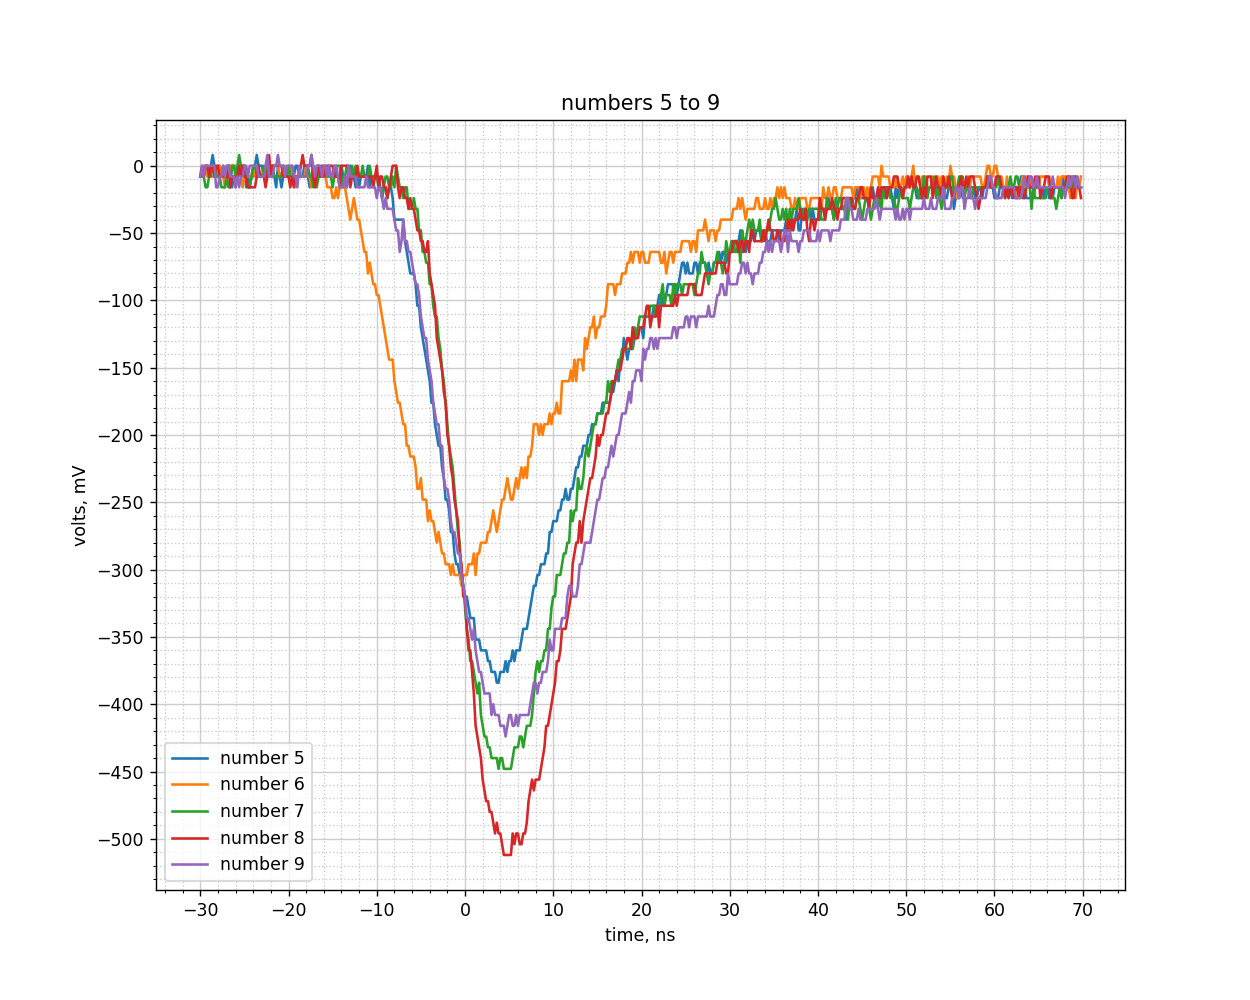

<IPython.core.display.Javascript object>


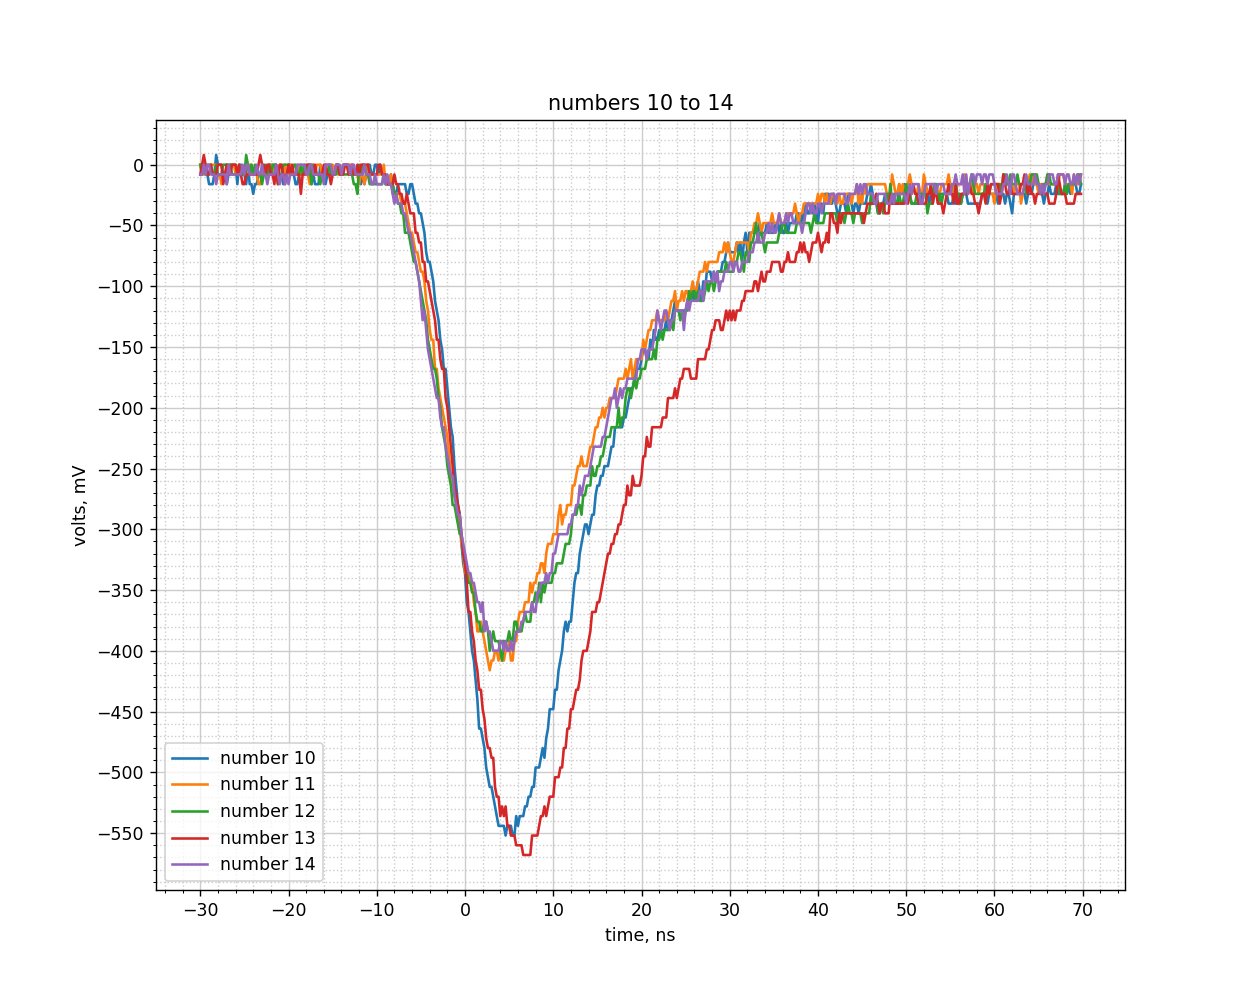

<IPython.core.display.Javascript object>


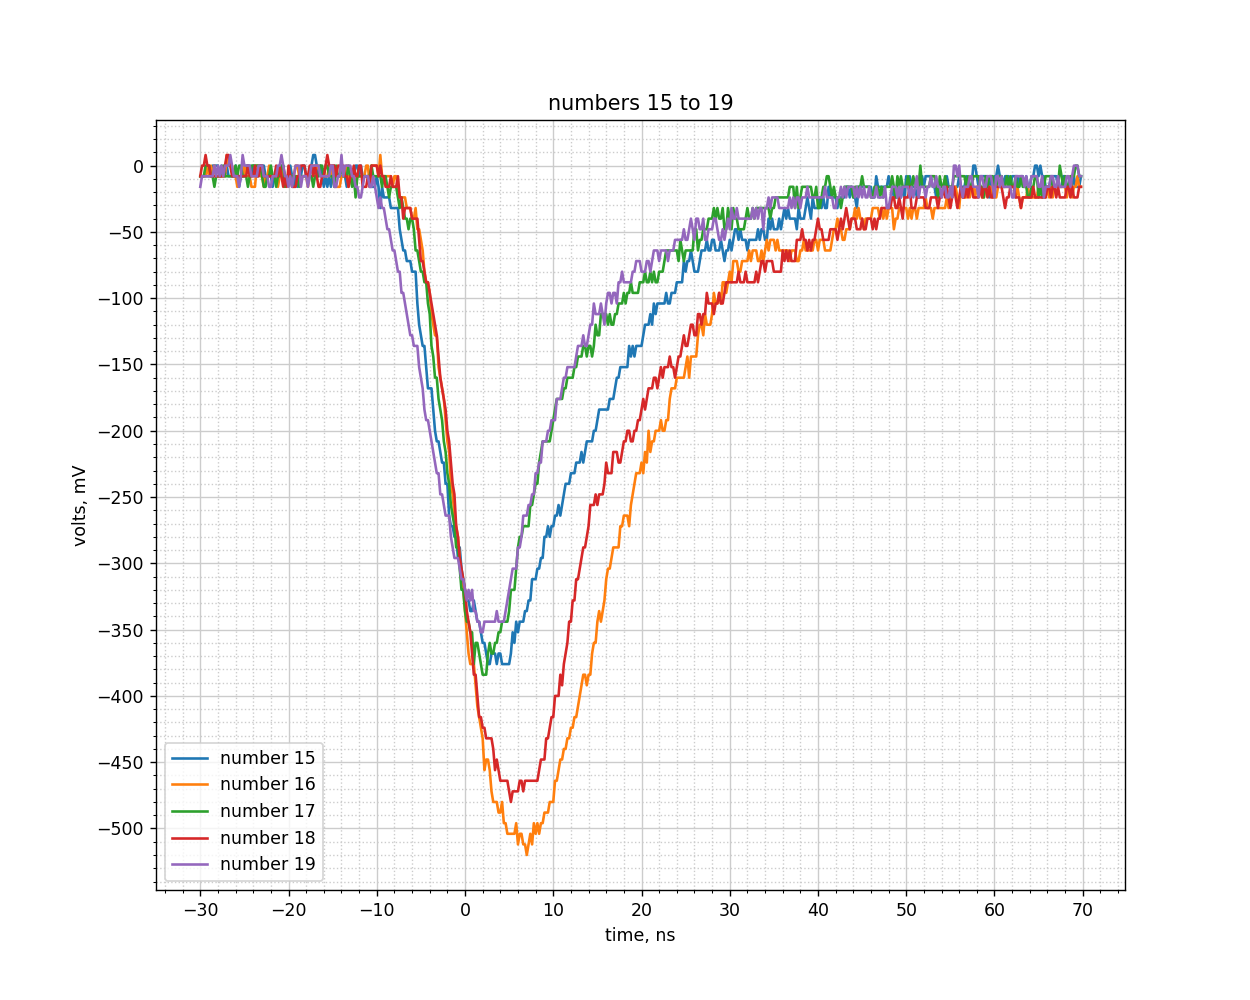

<IPython.core.display.Javascript object>


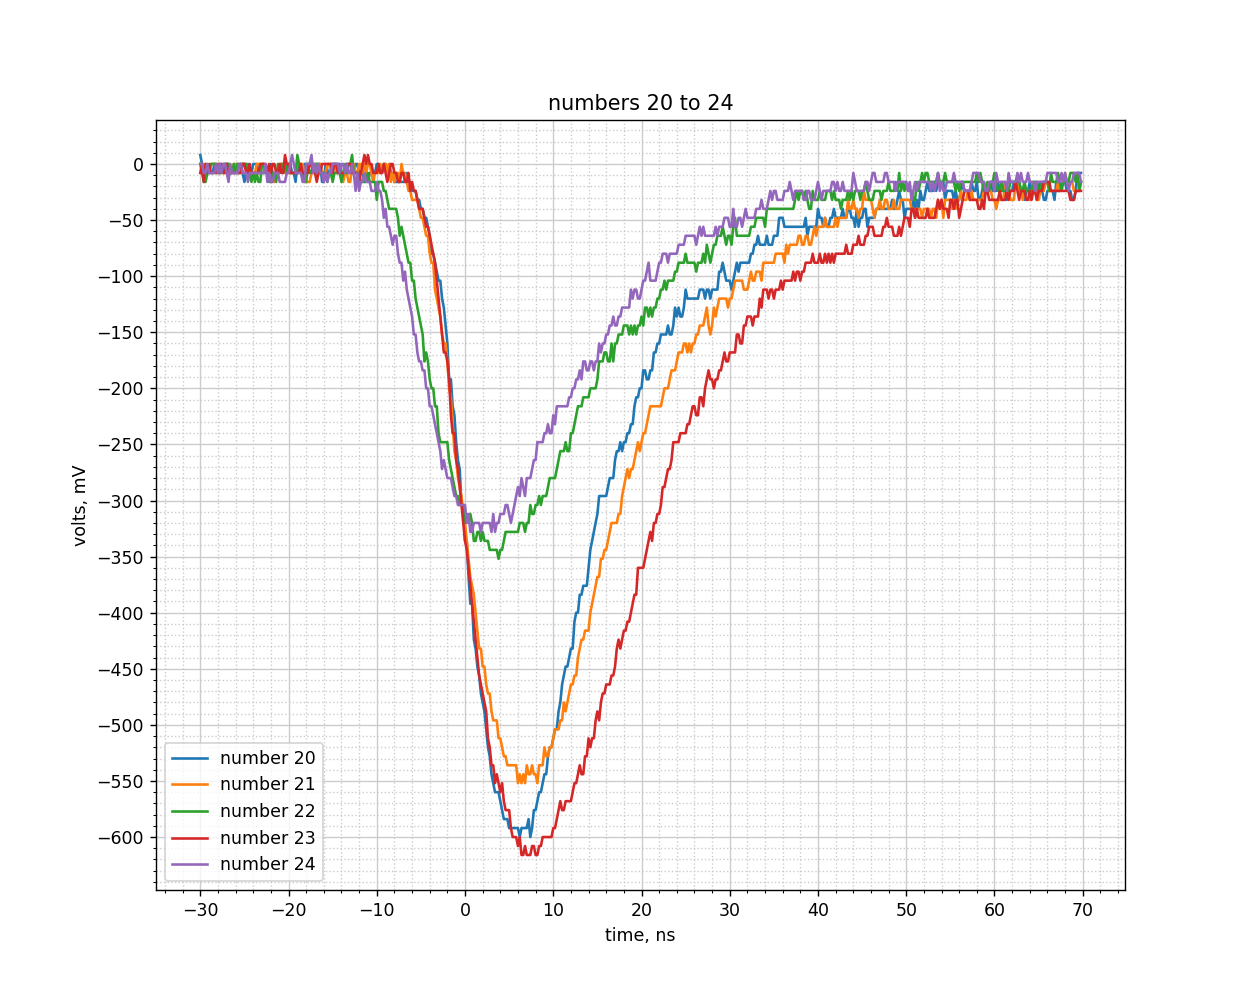

<IPython.core.display.Javascript object>


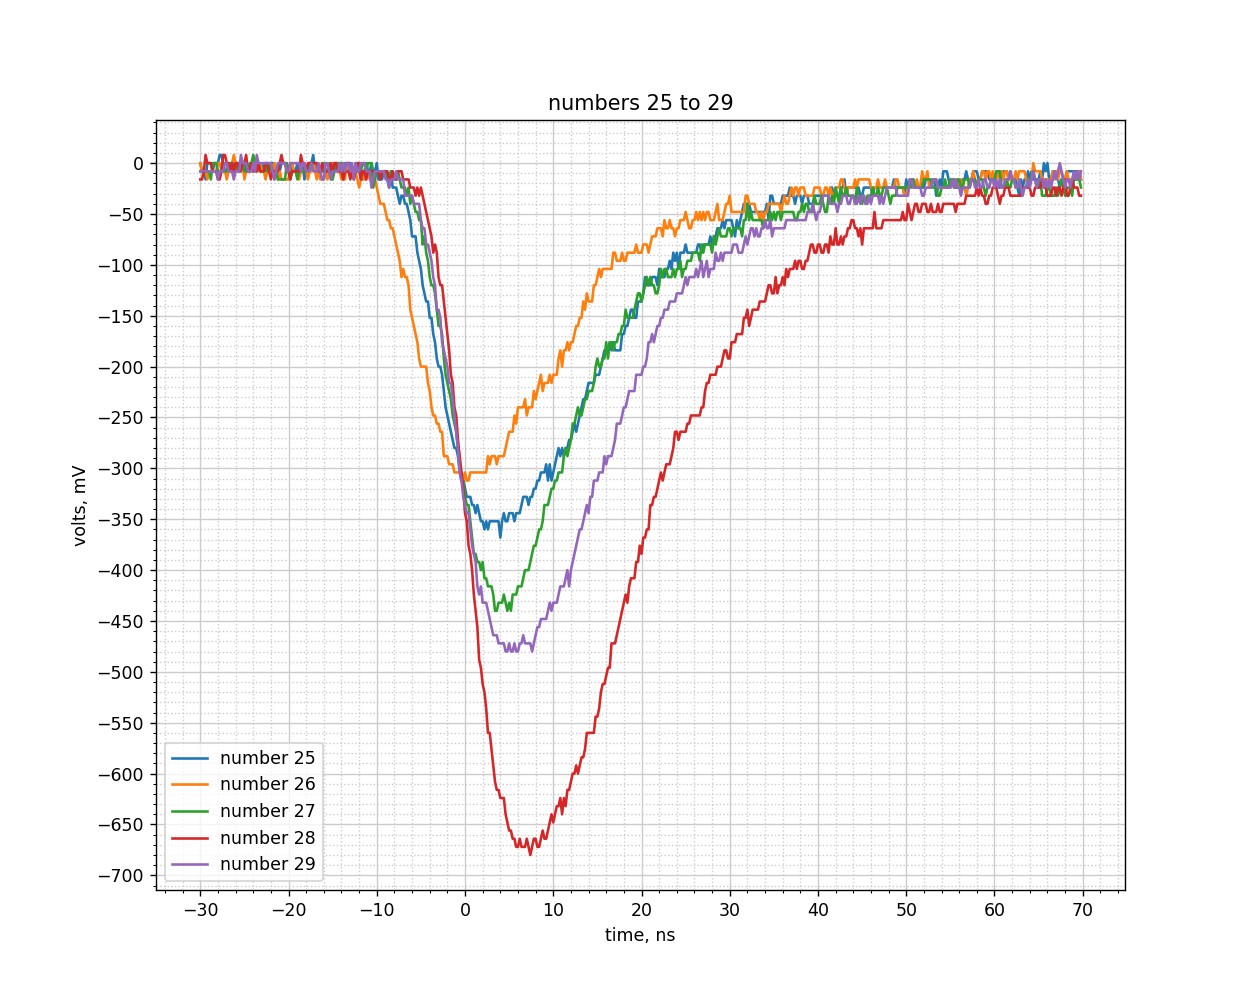

<IPython.core.display.Javascript object>


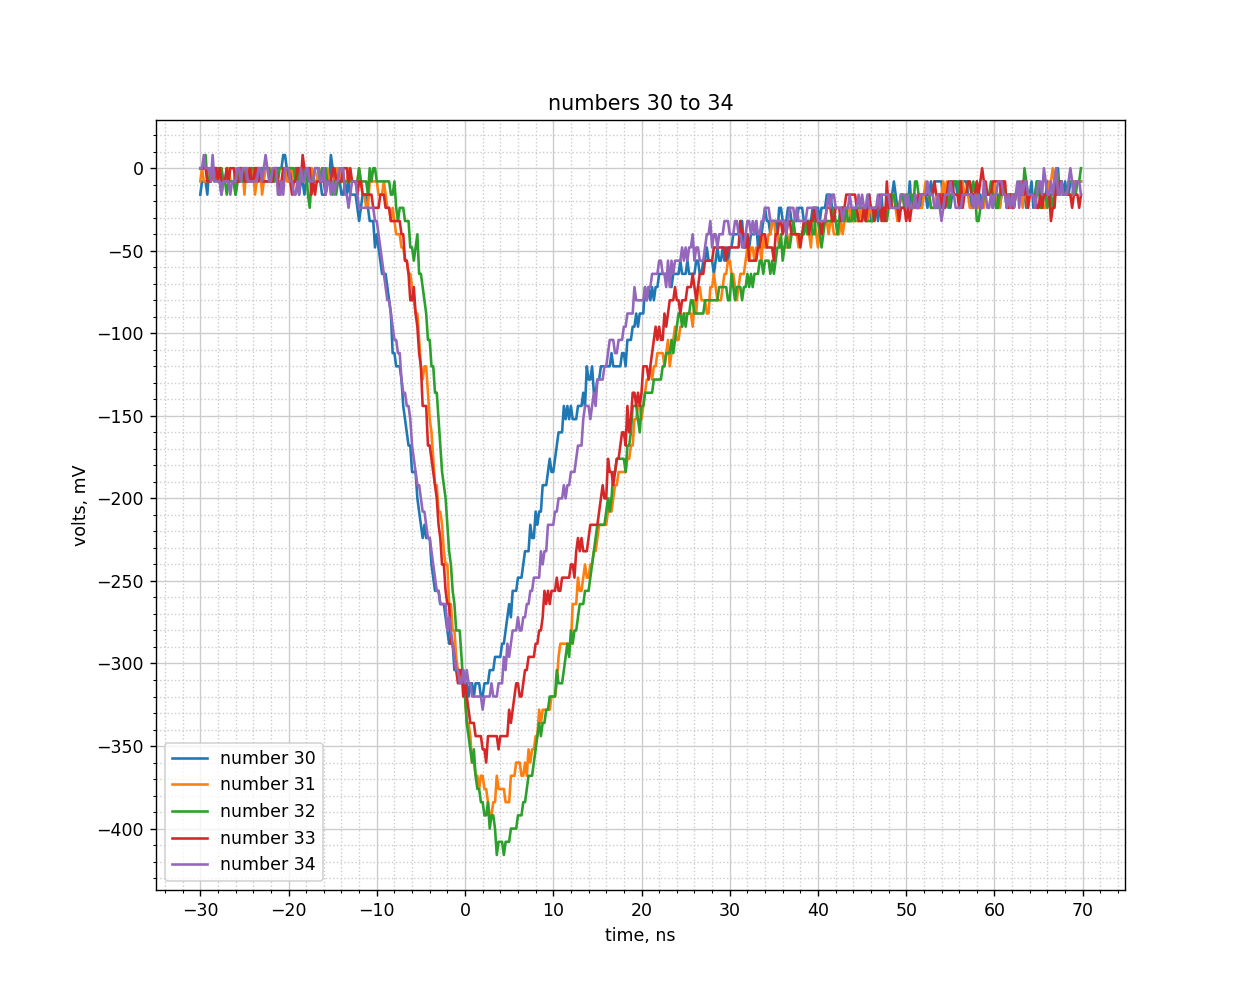

<IPython.core.display.Javascript object>


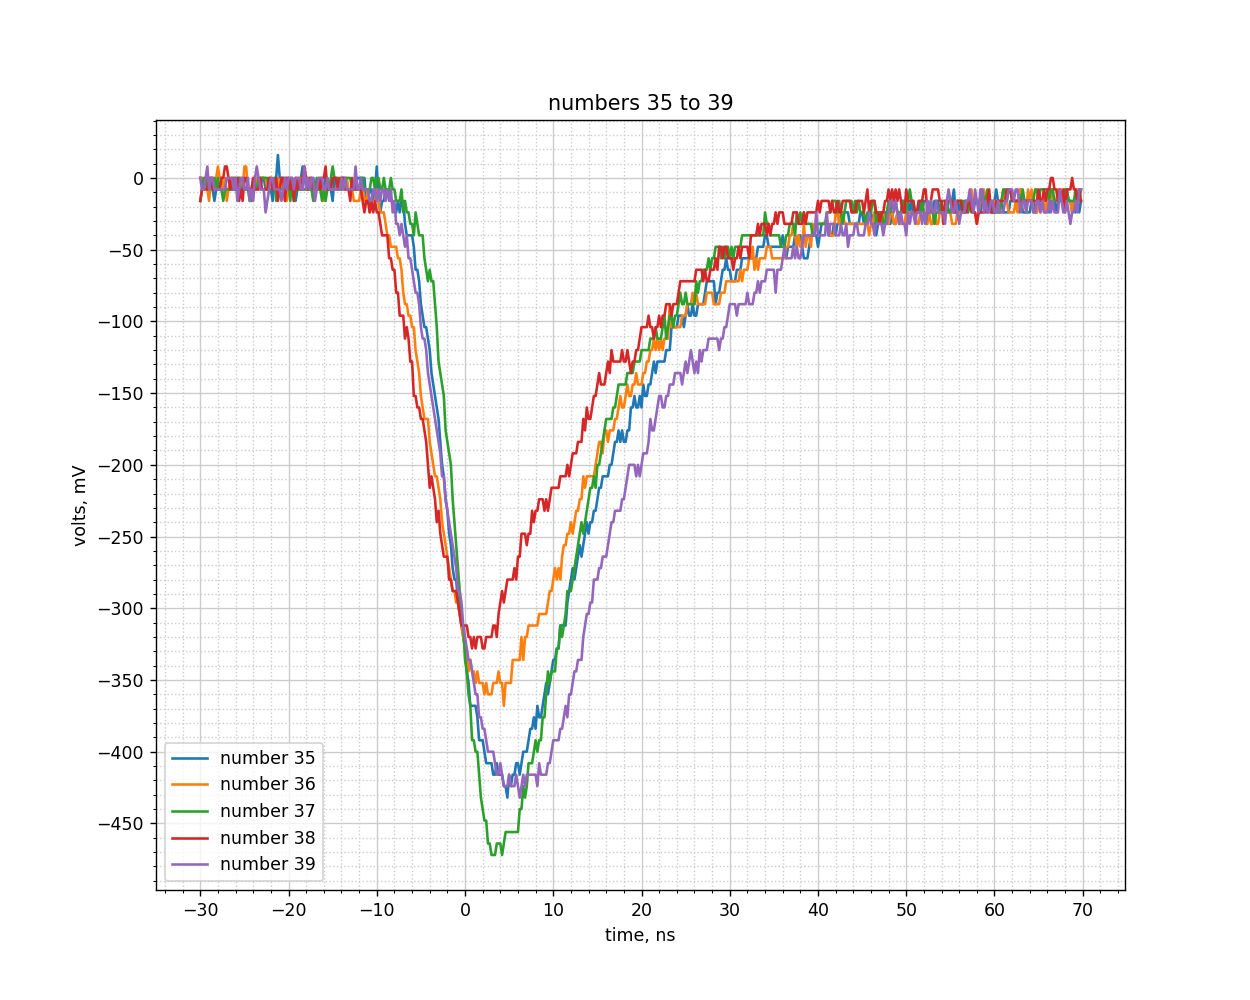

<IPython.core.display.Javascript object>


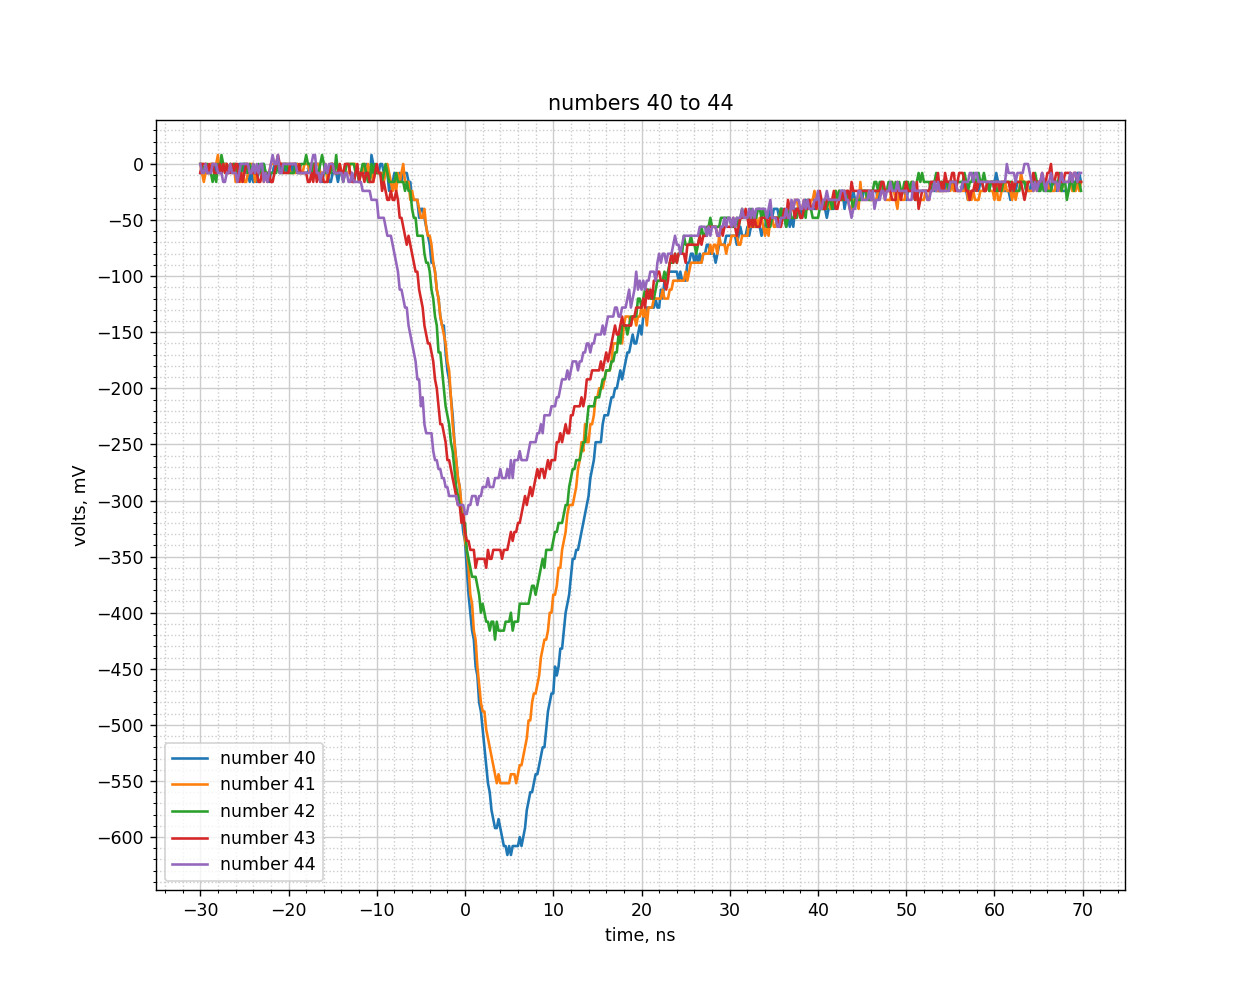

<IPython.core.display.Javascript object>


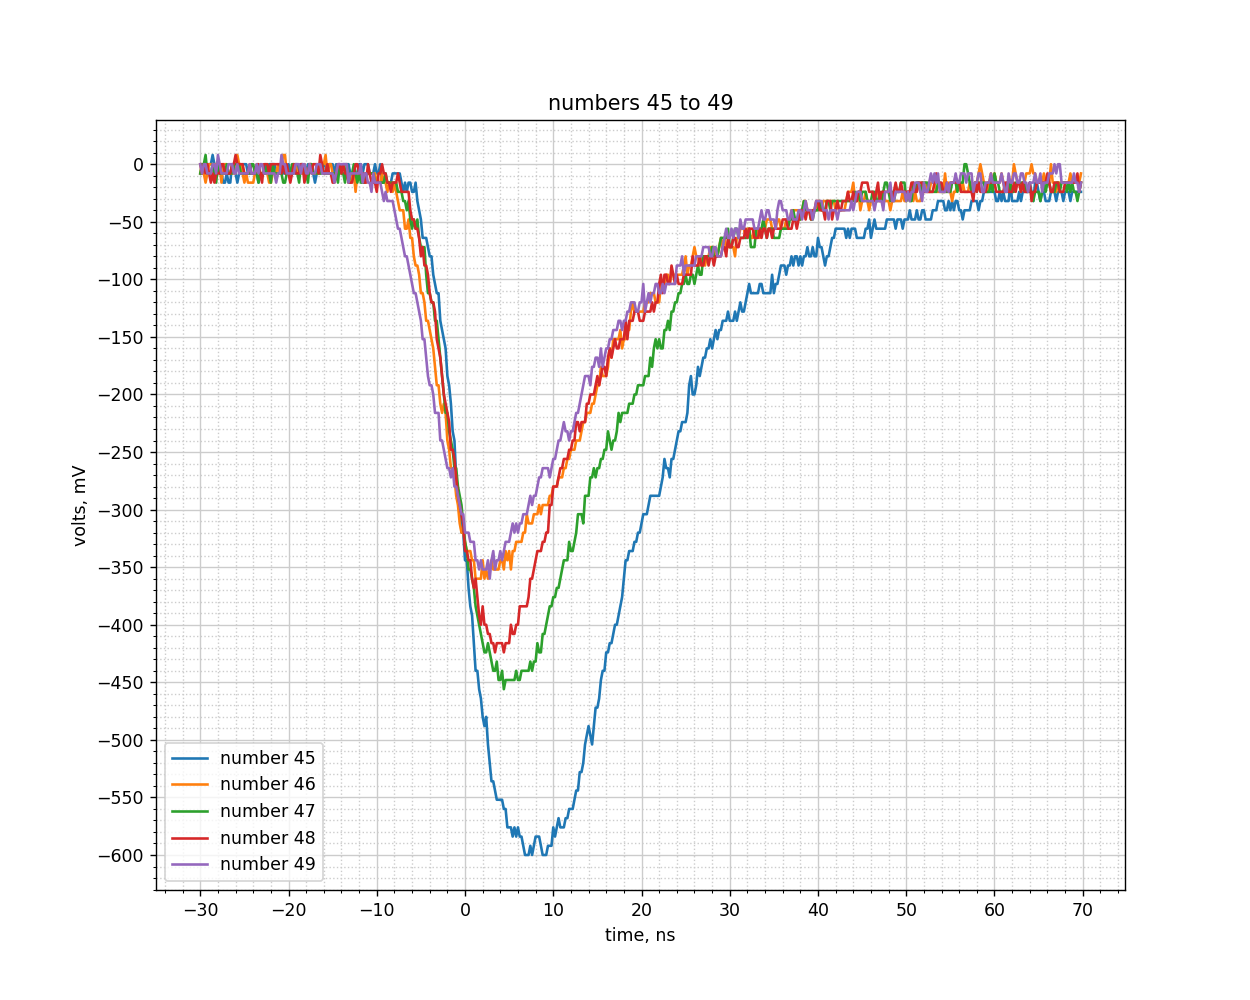

<IPython.core.display.Javascript object>


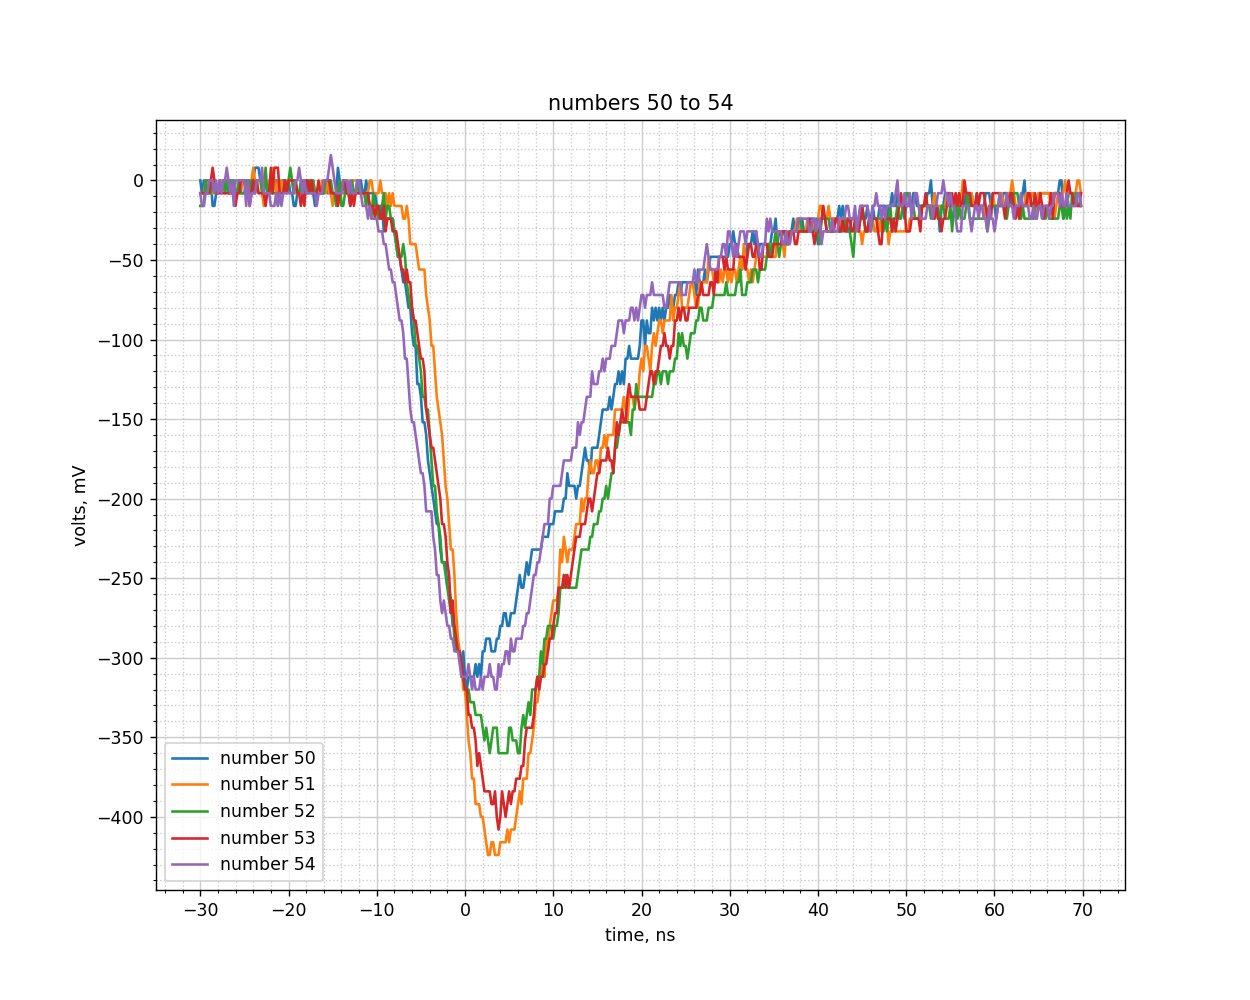

<IPython.core.display.Javascript object>


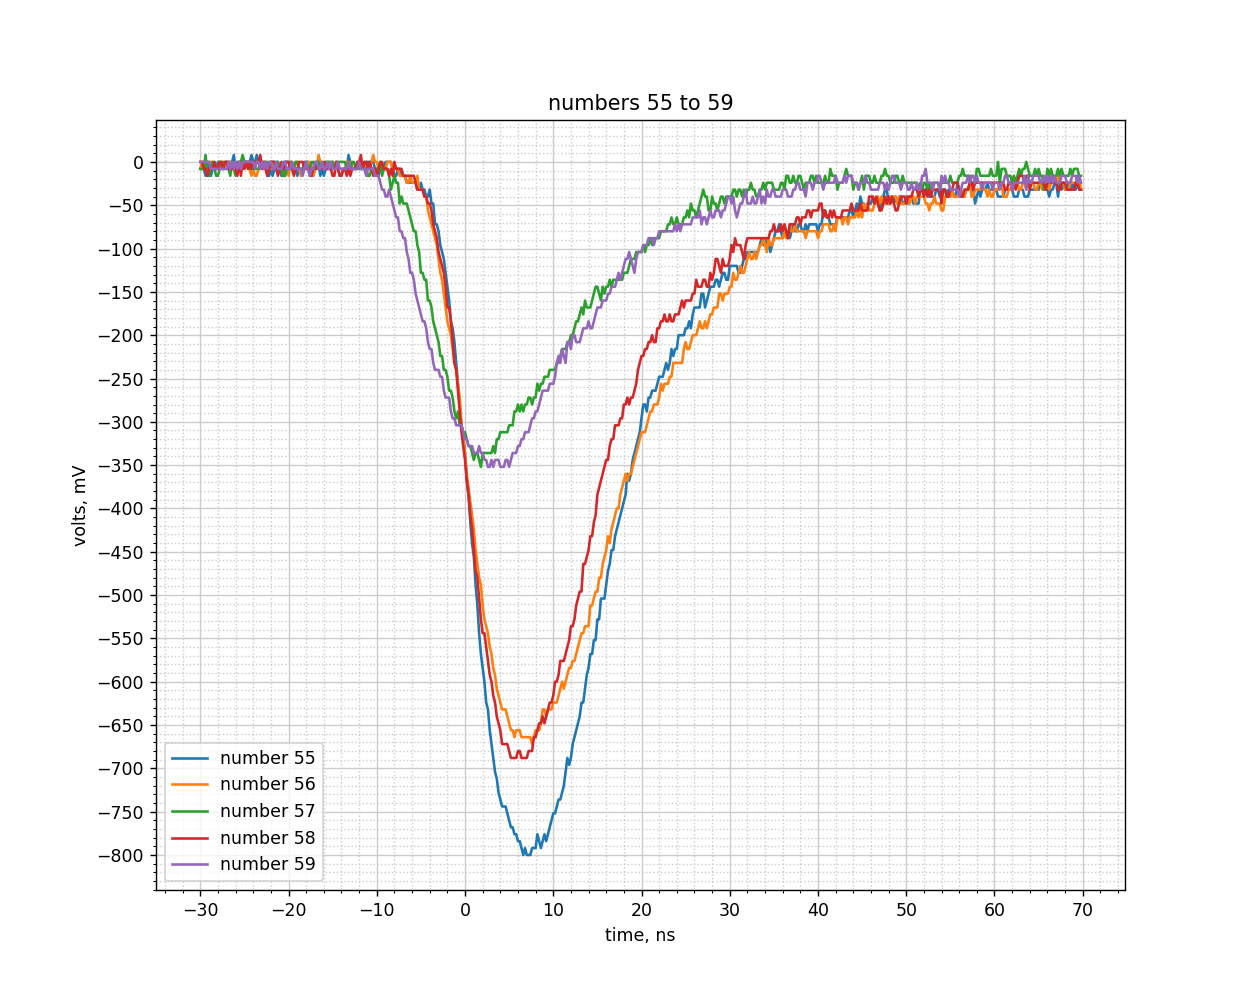

<IPython.core.display.Javascript object>


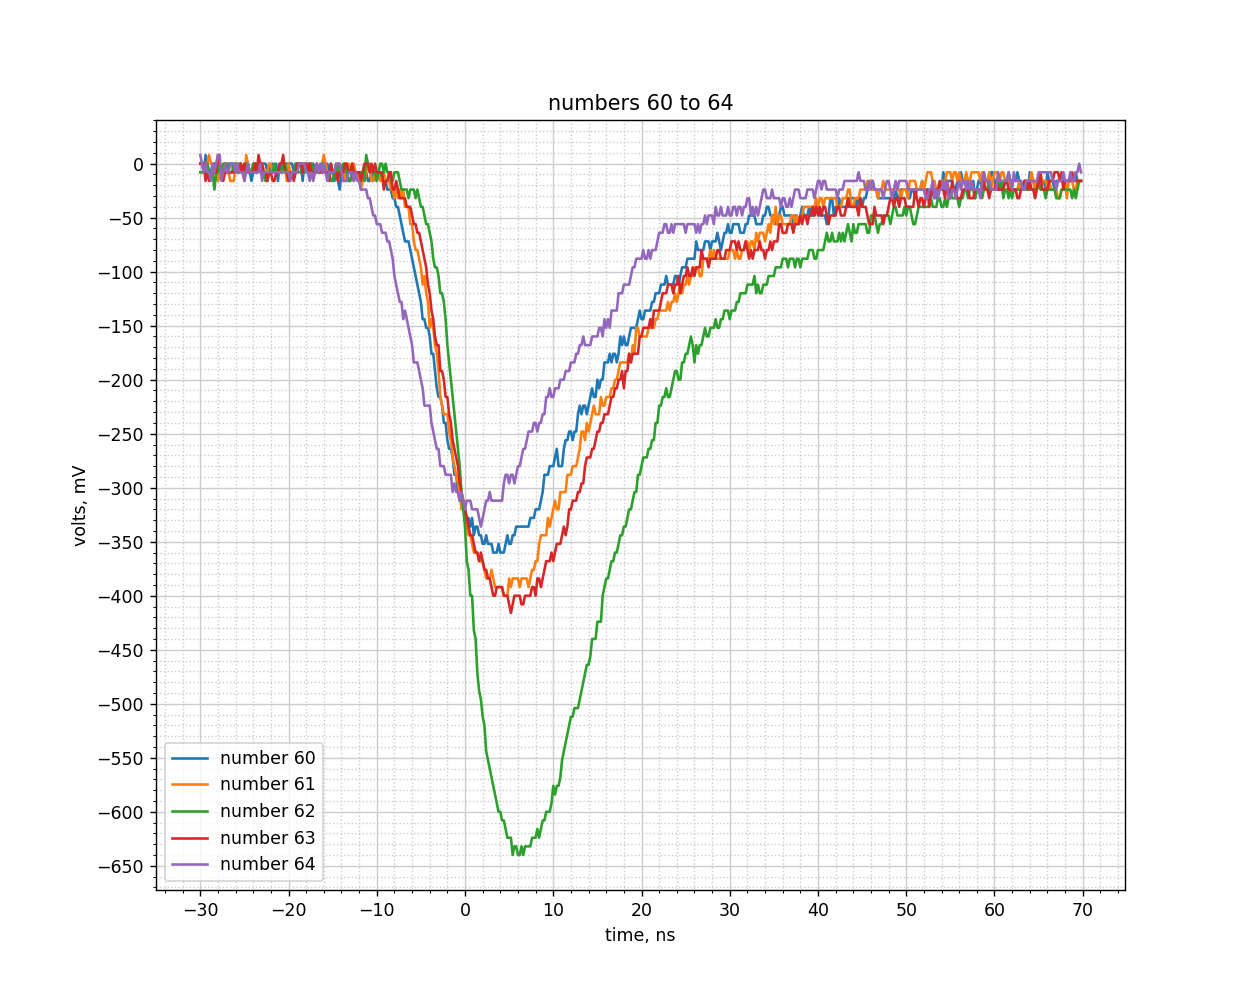

<IPython.core.display.Javascript object>


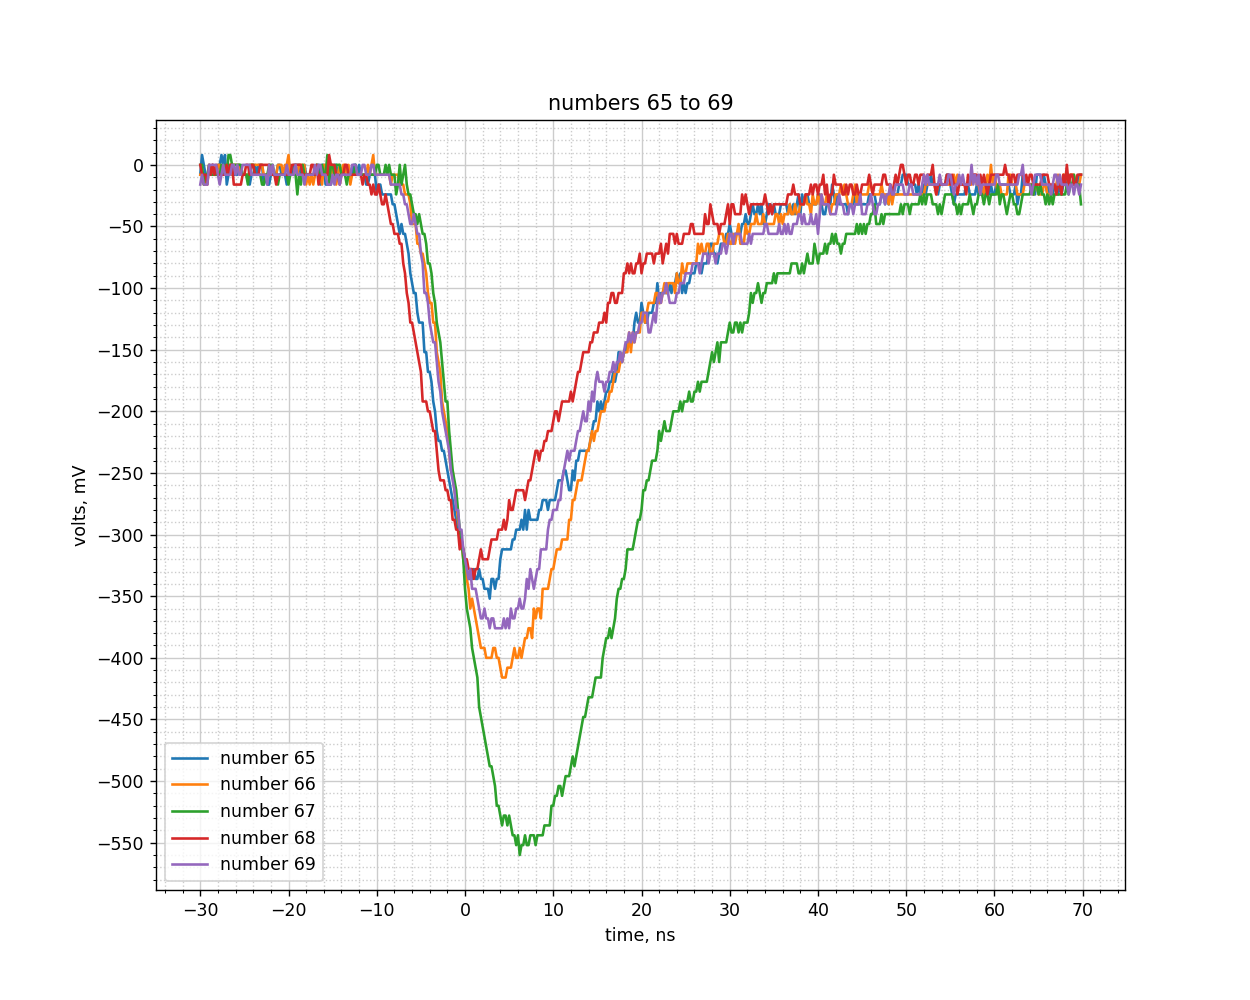

<IPython.core.display.Javascript object>


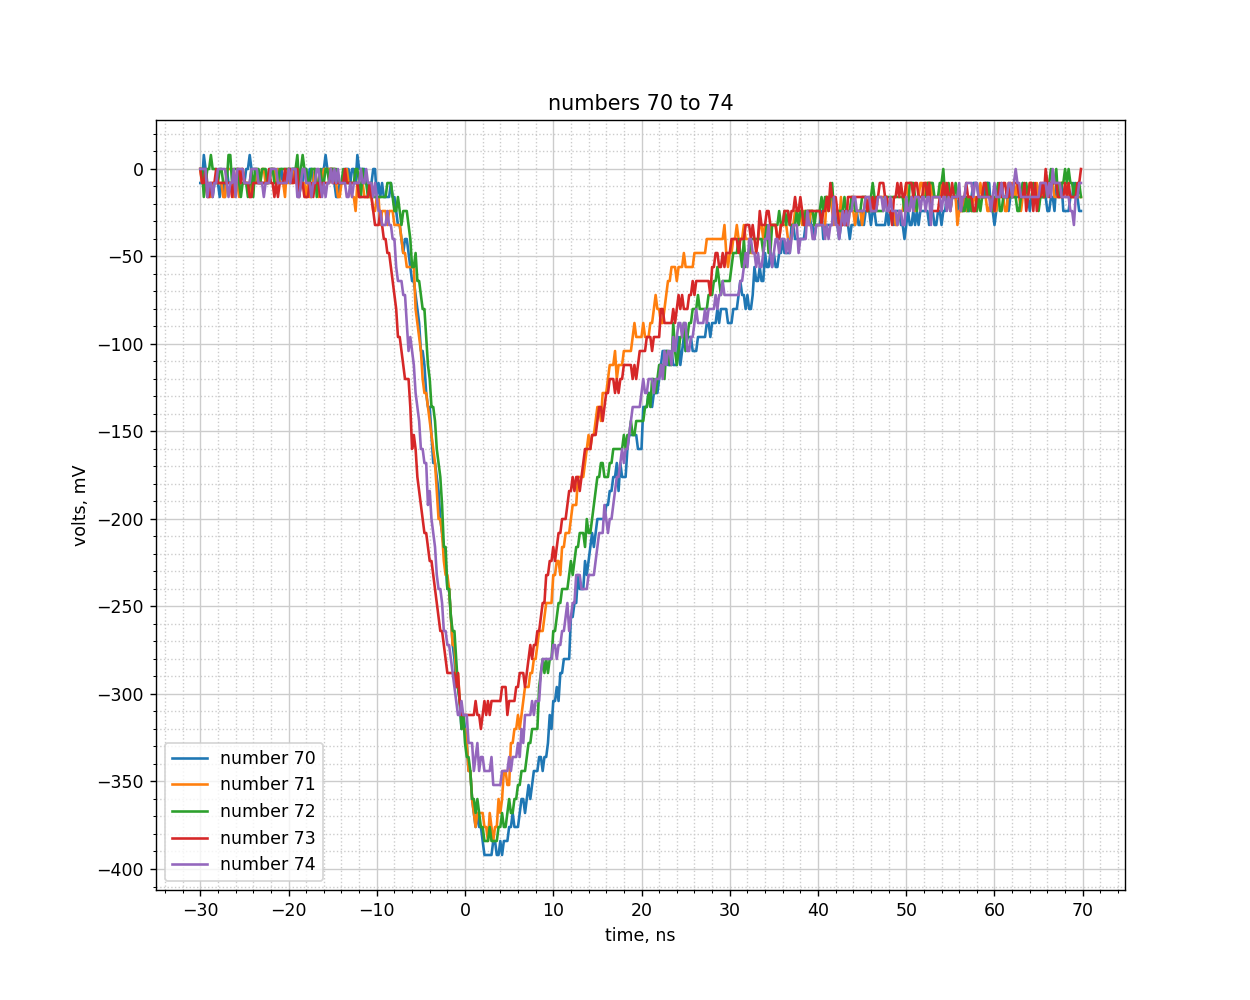

<IPython.core.display.Javascript object>


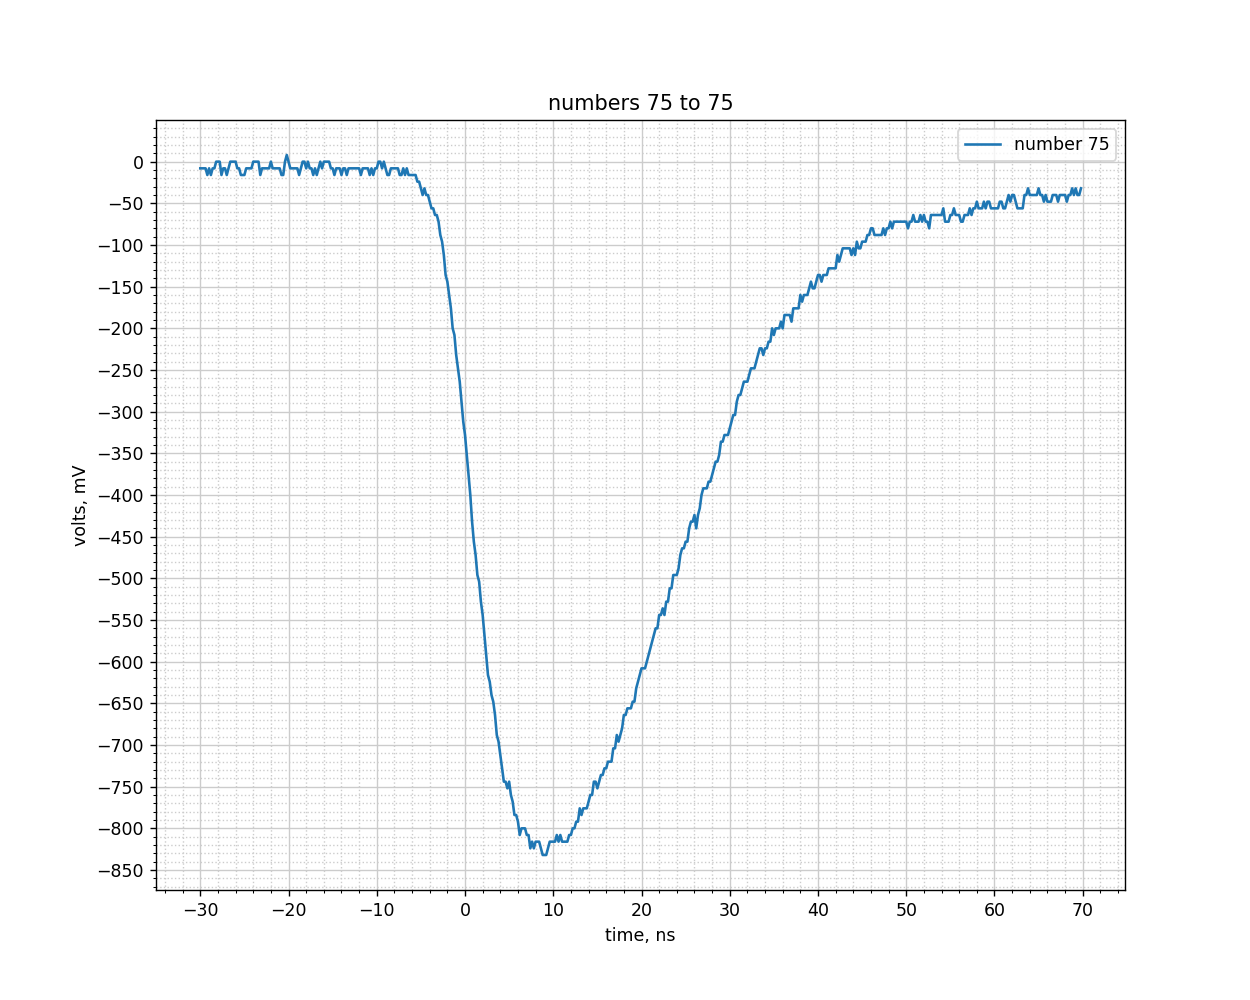

In [11]:
# iterate and put 5 traces into each plot??
numPoints = 500 # number of points in a waveform
numTraces = int( len(adf['time'])/numPoints +0.1 )
numPerPlot = 5


for ii in range(0,numTraces,numPerPlot):
    
    fig, ax = plt.subplots( figsize=(10,8) )
    
    jjrange = min(numPerPlot, numTraces-ii)  # Handle the end, with less than numPerPlot figures left.
    for jj in range( jjrange ):
        xx = adf['time'].values[(ii+jj)*numPoints:(ii+jj+1)*numPoints]*1e9 # put in ns
        yy = adf['volt'].values[(ii+jj)*numPoints:(ii+jj+1)*numPoints]*1000. # in mV
        ax.plot( xx, yy, '-', color=colors[jj%10], label=f'number {ii+jj}' )
        ofile = open(datadir + f'number{ii+jj}.csv', 'w')
        for xx, yy in zip(xx, yy):
            astr = f'{xx},\t{yy}\n'
            ofile.write(astr)
        ofile.close()

    ax.set_xlabel('time, ns')
    ax.set_ylabel('volts, mV')
    ax.set_title(f'numbers {ii} to {ii+jjrange-1}' )
    ax.legend()
    
    if 1:
        # Change major ticks to show every 20.
        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_major_locator(MultipleLocator(50))

        # Change minor ticks to show every 5. (20/4 = 5)
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))

        # Turn grid on for both major and minor ticks and style minor slightly
        # differently.
        ax.grid(which='major', color='#CCCCCC', linestyle='-')
        ax.grid(which='minor', color='#CCCCCC', linestyle=':')

        #ax.grid(True)

    plt.savefig(datadir + f'numbers{ii}to{ii+jjrange-1}.png')    
    if ii==0: 
        plt.show()
    
#plt.show()

In [12]:
fname = 'number33.csv'
csvdf = pd.read_csv(datadir+fname, names=('time', 'volt'), usecols=(0,1) )
csvdf.head()

time      volt
0 -30.0 -0.000013
1 -29.8 -0.000013
2 -29.6 -0.000013
3 -29.4 -0.000013
4 -29.2 -8.000013

<IPython.core.display.Javascript object>


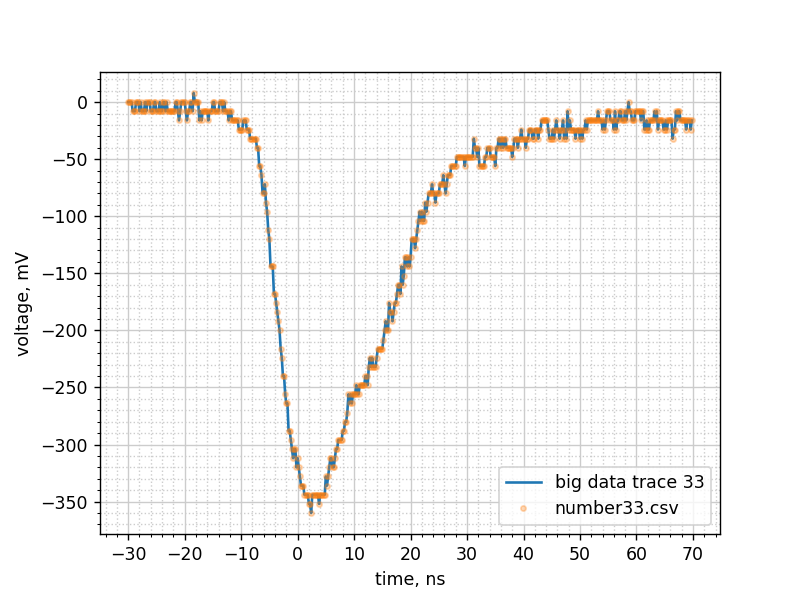

In [13]:
ntrace = 33 # the trace to plot and compare with csv file

xx = adf['time'].values[ntrace*500:ntrace*500+500]*1e9 # in ns
yy = adf['volt'].values[ntrace*500:ntrace*500+500]*1000. # in mV

xx2 = csvdf['time'].values # already in ns
yy2 = csvdf['volt'].values # already in mV

fig, ax = plt.subplots( )

ax.plot( xx, yy, '-', color=colors[0%10], label=f'big data trace {ntrace}' )
ax.plot( xx2, yy2, '.', color=colors[1%10], alpha=0.3, label=f'{fname}' )

if 1:
    # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(50))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax.set_xlabel('time, ns')
ax.set_ylabel('voltage, mV')

ax.legend()

plt.show()